# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from collections import Counter

# set this so the graphs open internally
#%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

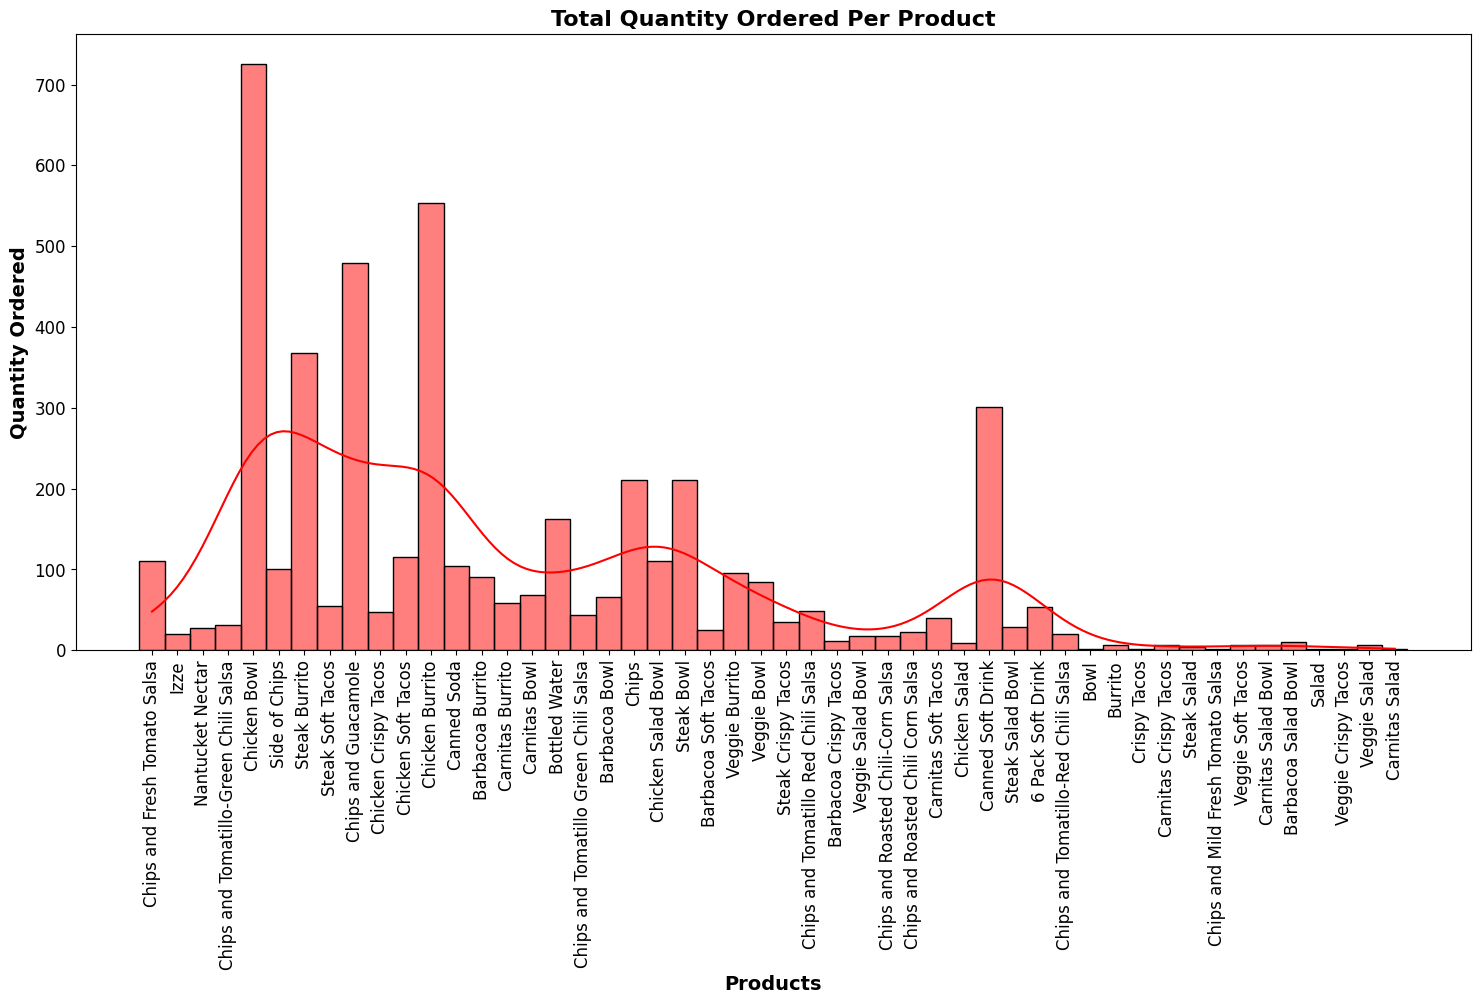

In [20]:
plt.figure(figsize=(18,8))

sns.histplot(data=chipo,x="item_name",color="red", edgecolor="black",kde=True,)
plt.xlabel("Products", fontsize=14,fontweight='bold')
plt.ylabel("Quantity Ordered", fontsize=14,fontweight='bold')
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Quantity Ordered Per Product', fontsize=16, fontweight='bold')
plt.show()

In [22]:
## Top 5 Product 
top_product=chipo.sort_values(by="quantity",ascending=False)
top_5_product=top_product.head()
top_5_product

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
4152,1660,10,Bottled Water,NaN,$15.00
3887,1559,8,Side of Chips,NaN,$13.52
3599,1443,7,Bottled Water,NaN,$10.50
2441,970,5,Bottled Water,NaN,$7.50


In [31]:
top_product=chipo.groupby("item_name")["quantity"].sum()
top_product= top_product.sort_values(ascending=False)
top_5_product=top_product.head()
top_5_product=top_5_product.reset_index()
top_5_product

,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351


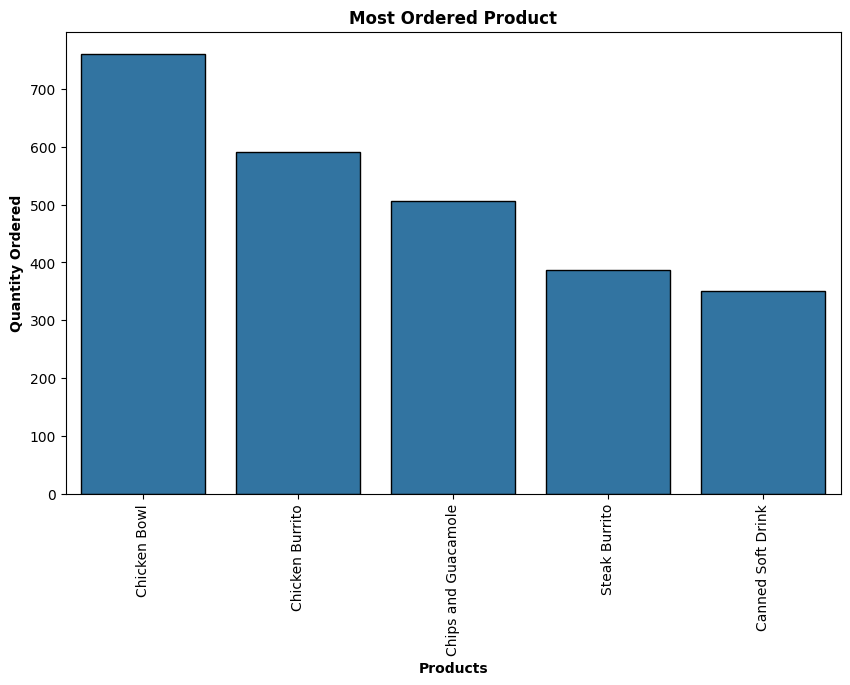

In [46]:
plt.figure(figsize=(10,6))

sns.barplot(data=top_5_product,x="item_name",y="quantity",edgecolor="Black")
plt.xlabel("Products", fontsize=10,fontweight='bold')
plt.ylabel("Quantity Ordered", fontsize=10,fontweight='bold')
plt.xticks(rotation=90)

plt.title('Most Ordered Product', fontsize=12, fontweight='bold')
plt.show()

Text(0, 0.5, 'Quantity Ordered')

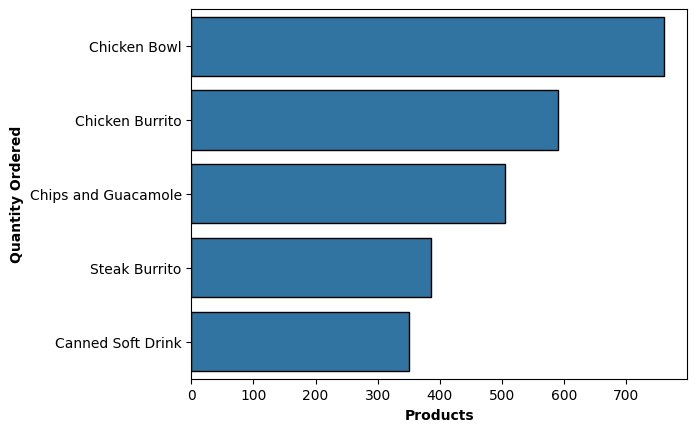

In [48]:
sns.barplot(data=top_5_product,x="quantity",y="item_name",edgecolor="Black",orient="h")
plt.xlabel("Products", fontsize=10,fontweight='bold')
plt.ylabel("Quantity Ordered", fontsize=10,fontweight='bold')


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [49]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [52]:
price= chipo["item_price"].str.slice(1)
price.head()

0     2.39 
1     3.39 
2     3.39 
3     2.39 
4    16.98 
Name: item_price, dtype: object

In [68]:
chipo["price"]=price.astype(float)
chipo

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


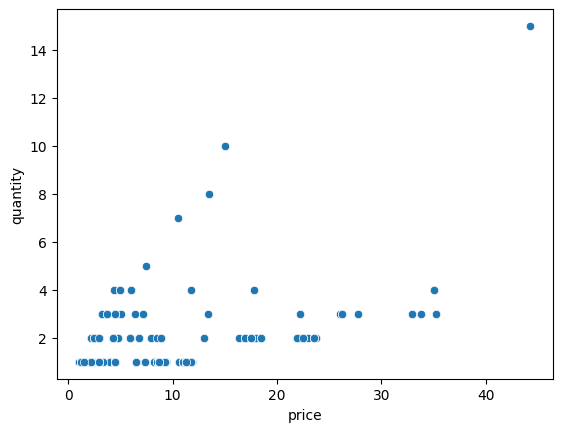

In [67]:
sns.scatterplot(data=chipo,x="price",y="quantity");

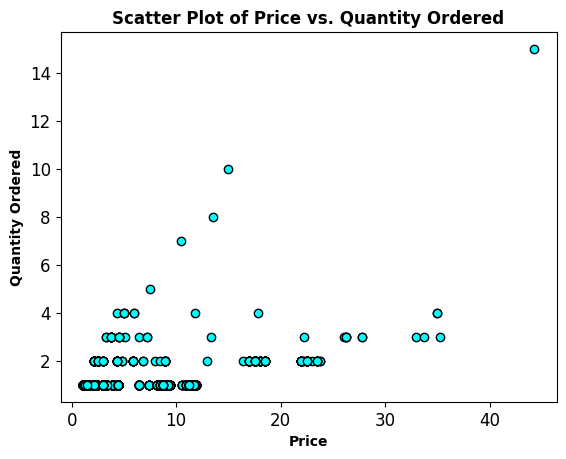

In [70]:
# Scatter plot
plt.scatter(chipo['price'], chipo['quantity'], color='cyan', edgecolor='black')

plt.xlabel('Price', fontsize=10, fontweight='bold')
plt.ylabel('Quantity Ordered', fontsize=10, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Scatter Plot of Price vs. Quantity Ordered', fontsize=12, fontweight='bold')
plt.show()

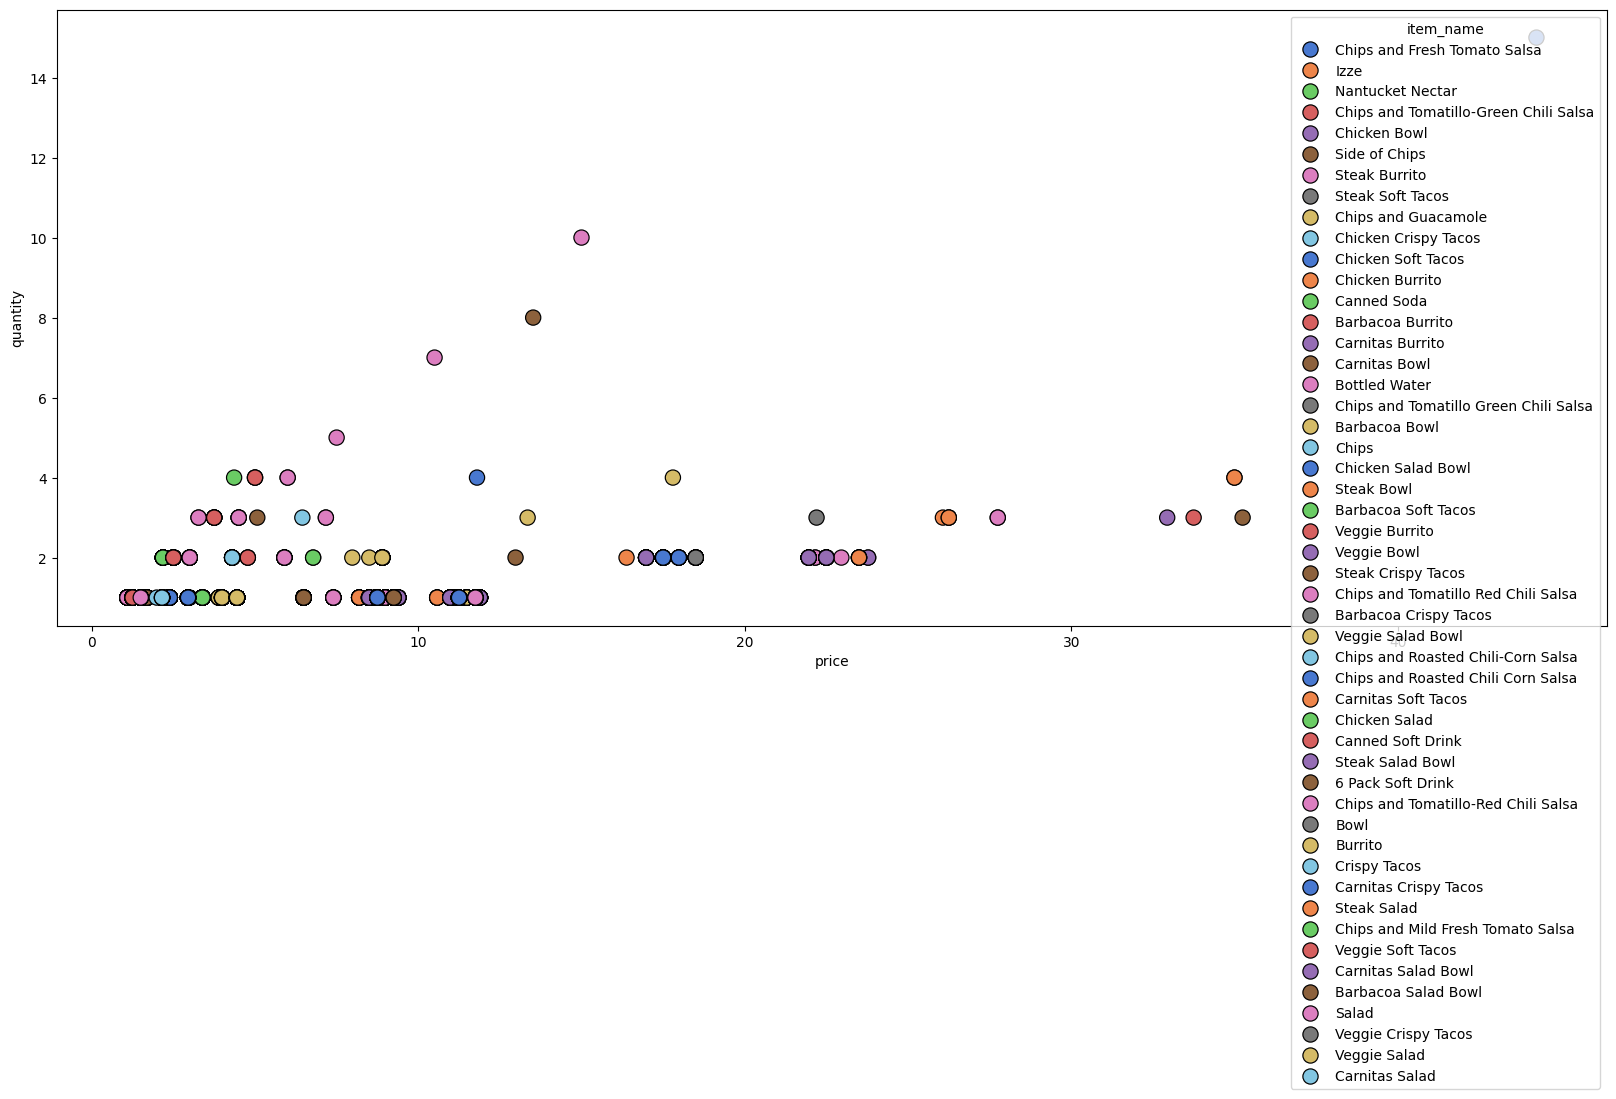

In [81]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=chipo,x="price",y="quantity",hue="item_name",s=120,palette="muted",edgecolor="black");

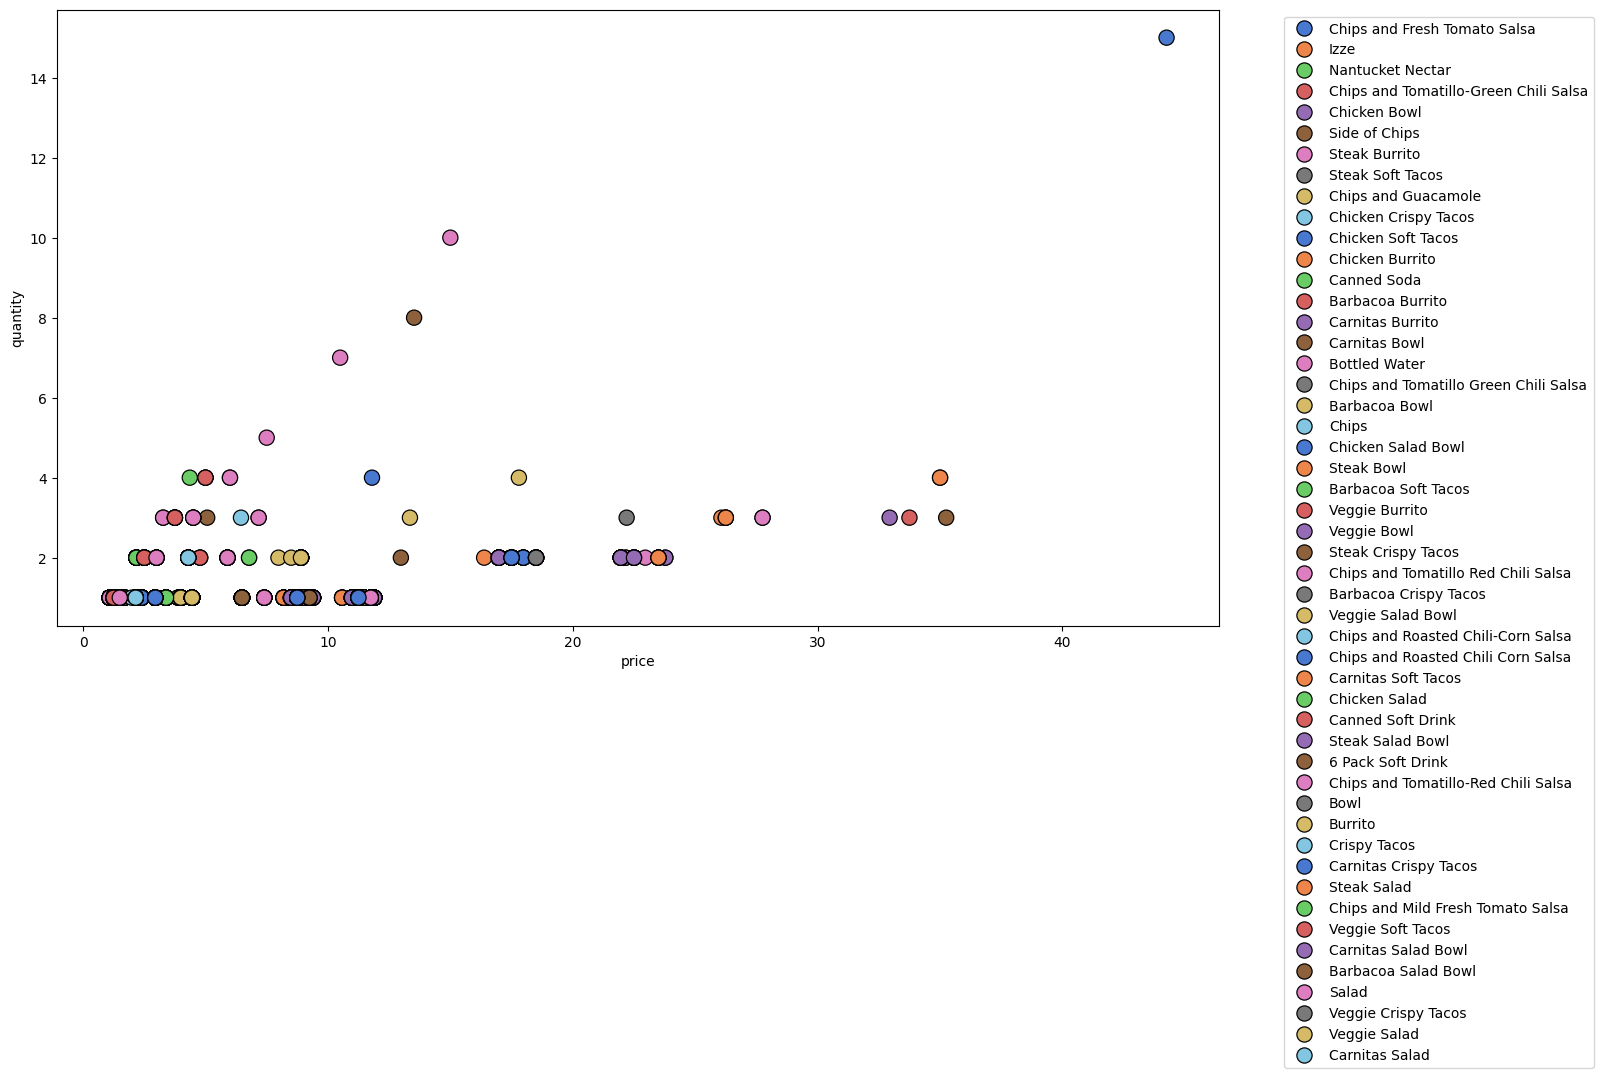

In [94]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=chipo,x="price",y="quantity",hue="item_name",s=120,palette="muted",edgecolor="black");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

bbox_to_anchor=(1.05, 1): This parameter moves the legend outside the plot area to the right (1.05 times the plot width) and above (1 times the plot height). Adjust these values as needed to position the legend where it fits best for your plot.

### Step 7. BONUS: Create a question and a graph to answer your own question.